In [89]:
from scipy.ndimage import gaussian_filter
from tifffile import imread
import cv2
import math
import os
from os.path import join, dirname
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

### Load Data

In [2]:
folder_FUS_miR21 = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig4_regulation/FUS488_miR21_PAINT/selected_condensates"
os.chdir(folder_FUS_miR21)

lst_fname_FUS_PAINT = [f for f in os.listdir(".") if f.endswith("-left-PAINT.tif")]
lst_fname_miR21_PAINT = [f[:-14] + "right-PAINT.tif" for f in lst_fname_FUS_PAINT]
lst_fname_FUS_step = [f[:-14] + "left-stepsize.tif" for f in lst_fname_FUS_PAINT]
lst_fname_miR21_step = [f[:-14] + "right-stepsize.tif" for f in lst_fname_FUS_PAINT]

lst_FUS_PAINT = [imread(f) for f in lst_fname_FUS_PAINT]
lst_miR21_PAINT = [imread(f) for f in lst_fname_miR21_PAINT]
lst_FUS_step = [imread(f) for f in lst_fname_FUS_step]
lst_miR21_step = [imread(f) for f in lst_fname_miR21_step]

### Functions

In [3]:
def weighted_Pearson(img1_flatten, img2_flatten, weights):
    # calculate mean for images and weights
    mean_img1 = np.sum(img1_flatten * weights) / np.sum(weights)
    mean_img2 = np.sum(img2_flatten * weights) / np.sum(weights)
    mean_weights = np.mean(weights)

    # calculate weighted covariance and variances
    cov = np.sum(
        weights * (img1_flatten - mean_img1) * (img2_flatten - mean_img2)
    ) / np.sum(weights)
    var_img1 = np.sum(weights * (img1_flatten - mean_img1) ** 2) / np.sum(weights)
    var_img2 = np.sum(weights * (img2_flatten - mean_img2) ** 2) / np.sum(weights)

    # calculate weighted correlation
    weighted_corr = cov / np.sqrt(var_img1 * var_img2)

    return weighted_corr

### FUS PAINT - FL PAINT

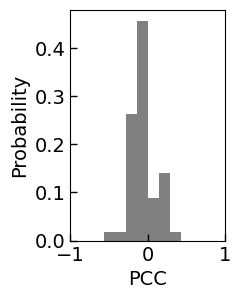

In [4]:
weighted_corr_FlocRloc = []
for img1, img2 in zip(lst_FUS_PAINT, lst_miR21_PAINT):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2 + img2_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FlocRloc.append(weighted_corr)

plt.figure(figsize=(2, 3))
plt.hist(
    weighted_corr_FlocRloc,
    bins=14,
    range=(-1, 1),
    color="gray",
    weights=np.ones_like(weighted_corr_FlocRloc) / len(weighted_corr_FlocRloc),
)
plt.xlim(-1, 1)
#plt.ylim(0, 0.37)
plt.xlabel("PCC", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=14,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "../weighted_pearson_FlocRloc.png", format="png", dpi=300, bbox_inches="tight"
)

### FUS PAINT-stepsize

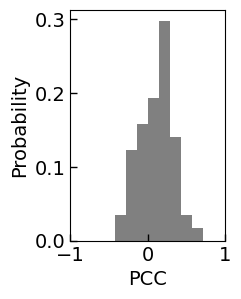

In [5]:
weighted_corr_FlocFstep = []
for img1, img2 in zip(lst_FUS_PAINT, lst_FUS_step):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FlocFstep.append(weighted_corr)

plt.figure(figsize=(2, 3))
plt.hist(
    weighted_corr_FlocFstep,
    bins=14,
    range=(-1, 1),
    color="gray",
    weights=np.ones_like(weighted_corr_FlocFstep) / len(weighted_corr_FlocFstep),
)
plt.xlim(-1, 1)
# plt.ylim(0, 0.5)
plt.xlabel("PCC", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=14,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "../weighted_pearson_FlocFstep.png", format="png", dpi=300, bbox_inches="tight"
)

### FL PAINT-stepsize

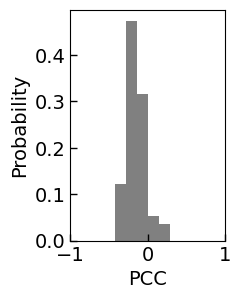

In [6]:
weighted_corr_RlocRstep = []
for img1, img2 in zip(lst_miR21_PAINT, lst_miR21_step):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_RlocRstep.append(weighted_corr)

plt.figure(figsize=(2, 3))
plt.hist(
    weighted_corr_RlocRstep,
    bins=14,
    range=(-1, 1),
    color="gray",
    weights=np.ones_like(weighted_corr_RlocRstep) / len(weighted_corr_RlocRstep),
)
plt.xlim(-1, 1)
#plt.ylim(0, 0.37)
plt.xlabel("PCC", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=14,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "../weighted_pearson_RlocRstep.png", format="png", dpi=300, bbox_inches="tight"
)

### FUS step - FL step

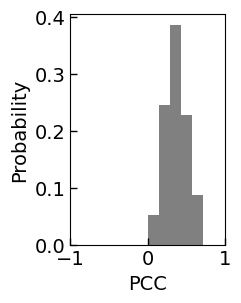

In [7]:
weighted_corr_FstepRstep = []
for img1, img2, w1, w2 in zip(lst_FUS_step, lst_miR21_step, lst_FUS_PAINT, lst_miR21_PAINT):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = w1.flatten() ** 2 + w2.flatten() ** 2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FstepRstep.append(weighted_corr)

plt.figure(figsize=(2, 3))
plt.hist(
    weighted_corr_FstepRstep,
    bins=14,
    range=(-1, 1),
    color="gray",
    weights=np.ones_like(weighted_corr_FstepRstep) / len(weighted_corr_FstepRstep),
)
plt.xlim(-1, 1)
#plt.ylim(0, 0.37)
plt.xlabel("PCC", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=14,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "../weighted_pearson_FstepRstep.png", format="png", dpi=300, bbox_inches="tight"
)

### Stats compare miR21-FL

In [9]:
df_FUS_miR21 = pd.DataFrame(
    {
        "label": np.repeat("miRNA-21", len(weighted_corr_FlocRloc)),
        "FlocRloc": weighted_corr_FlocRloc,
        "FstepRstep": weighted_corr_FstepRstep,
        "FlocFstep": weighted_corr_FlocFstep,
        "RlocRstep": weighted_corr_RlocRstep,
    },
    dtype=object,
)
df_FUS_miR21 = df_FUS_miR21.astype(
    {
        "FlocRloc": float,
        "FstepRstep": float,
        "FlocFstep": float,
        "RlocRstep": float,
    }
)

In [10]:
folder_FUS_FL = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig3_coralled by nano domains/FUS488_FL_PAINT/pooled_better_best"
os.chdir(folder_FUS_FL)

lst_fname_FUS_PAINT = [f for f in os.listdir(".") if f.endswith("-left-PAINT.tif")]
lst_fname_FL_PAINT = [f[:-14] + "right-PAINT.tif" for f in lst_fname_FUS_PAINT]
lst_fname_FUS_step = [f[:-14] + "left-stepsize.tif" for f in lst_fname_FUS_PAINT]
lst_fname_FL_step = [f[:-14] + "right-stepsize.tif" for f in lst_fname_FUS_PAINT]

lst_FUS_PAINT = [imread(f) for f in lst_fname_FUS_PAINT]
lst_FL_PAINT = [imread(f) for f in lst_fname_FL_PAINT]
lst_FUS_step = [imread(f) for f in lst_fname_FUS_step]
lst_FL_step = [imread(f) for f in lst_fname_FL_step]

weighted_corr_FlocRloc = []
for img1, img2 in zip(lst_FUS_PAINT, lst_FL_PAINT):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2 + img2_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FlocRloc.append(weighted_corr)

weighted_corr_FlocFstep = []
for img1, img2 in zip(lst_FUS_PAINT, lst_FUS_step):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FlocFstep.append(weighted_corr)

weighted_corr_RlocRstep = []
for img1, img2 in zip(lst_FL_PAINT, lst_FL_step):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_RlocRstep.append(weighted_corr)

weighted_corr_FstepRstep = []
for img1, img2, w1, w2 in zip(lst_FUS_step, lst_FL_step, lst_FUS_PAINT, lst_FL_PAINT):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = w1.flatten() ** 2 + w2.flatten() ** 2
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    weighted_corr_FstepRstep.append(weighted_corr)

df_FUS_FL = pd.DataFrame(
    {
        "label": np.repeat("FL mRNA", len(weighted_corr_FlocRloc)),
        "FlocRloc": weighted_corr_FlocRloc,
        "FstepRstep": weighted_corr_FstepRstep,
        "FlocFstep": weighted_corr_FlocFstep,
        "RlocRstep": weighted_corr_RlocRstep,
    },
    dtype=object,
)
df_FUS_FL = df_FUS_FL.astype(
    {
        "FlocRloc": float,
        "FstepRstep": float,
        "FlocFstep": float,
        "RlocRstep": float,
    }
)

In [11]:
df_plot = pd.melt(
    pd.concat([df_FUS_FL, df_FUS_miR21]),
    id_vars=["label"],
    value_vars=["FlocRloc", "FstepRstep", "FlocFstep", "RlocRstep"],
    var_name="pair_name",
    value_name="pearsonr",
)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

FstepRstep_FL mRNA v.s. FstepRstep_miRNA-21: t-test independent samples with Bonferroni correction, P_val=2.359e-01 stat=1.903e+00
FlocRloc_FL mRNA v.s. FlocRloc_miRNA-21: t-test independent samples with Bonferroni correction, P_val=2.610e-12 stat=-7.896e+00
FlocFstep_FL mRNA v.s. FlocFstep_miRNA-21: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=6.745e-01
RlocRstep_FL mRNA v.s. RlocRstep_miRNA-21: t-test independent samples with Bonferroni correction, P_val=1.798e-01 stat=-2.023e+00


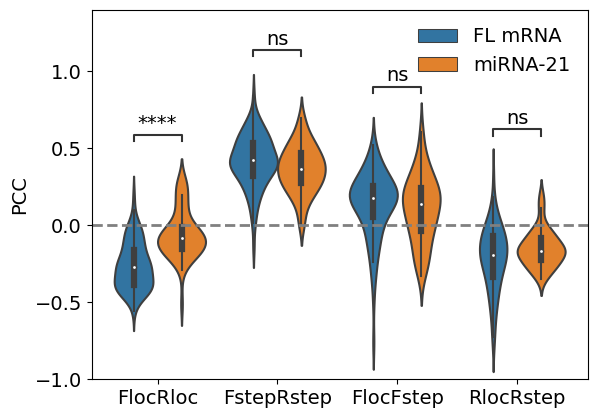

In [90]:
import seaborn as sns
from statannot import add_stat_annotation

plt.close()
plt.figure()
ax = sns.violinplot(
    data=df_plot,
    x="pair_name",
    y="pearsonr",
    hue="label",
    dodge=True,
)

add_stat_annotation(
    ax,
    data=df_plot,
    x="pair_name",
    y="pearsonr",
    hue="label",
    box_pairs=[
        (("FlocRloc", "FL mRNA"), ("FlocRloc", "miRNA-21")),
        (("FstepRstep", "FL mRNA"), ("FstepRstep", "miRNA-21")),
        (("FlocFstep", "FL mRNA"), ("FlocFstep", "miRNA-21")),
        (("RlocRstep", "FL mRNA"), ("RlocRstep", "miRNA-21")),
    ],
    test="t-test_ind",
    text_format="star",
    loc="inside",
    verbose=2,
    line_offset_to_box=0.12,
)

plt.legend(frameon=False)
plt.ylabel("PCC")
plt.ylim(-1, 1.4)
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.gca().set(xlabel=None)
plt.rcParams.update({"font.size": 14})
plt.axhline(0, ls="--", c="gray", lw=2)
os.chdir(dirname(folder_FUS_miR21))
plt.savefig("FL_vs_miR21_PCC.png", format="png", dpi=300, bbox_inches="tight")